In [19]:
import pandas as pd
import numpy as np
pd.__version__

'1.0.3'

In [20]:
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [21]:
df.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2352,2353,02/25/2020,NaN,Algeria,2020-02-25T23:43:03,1.0,0.0,0.0
507,508,02/01/2020,Shaanxi,Mainland China,2/1/2020 5:37,101.0,0.0,0.0
1125,1126,02/10/2020,Zhejiang,Mainland China,2020-02-10T14:13:12,1092.0,0.0,242.0
1348,1349,02/13/2020,Jiangsu,Mainland China,2020-02-13T10:33:23,570.0,0.0,139.0
2643,2644,02/28/2020,NaN,Croatia,2020-02-28T15:43:03,5.0,0.0,0.0


In [22]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])     #Se convierte a serie de tiempo
df.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


In [23]:
list(df)      #df.columns.values 

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [24]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0


In [25]:
df_time = df.groupby('ObservationDate').sum()
df_time.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [26]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [27]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [28]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [29]:
df_time.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [30]:
df_diff = df_time.diff()            #diff resta cada dia con el dia anterior, para ir viendo el aumento de casos dia a dia  
df_diff.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0


In [31]:
df_time.diff().mean()         #Aqui vemos los casos promedio por dia 

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

In [32]:
df_time.head(1).to_dict()     #Convertimos a dicc el primer valor del df  

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [33]:
df_diff = df_diff.fillna({'Confirmed': 555.0,              #Rellenamos los valores nulos de la primera fila que teniamos
 'Deaths': 17.0,
 'Recovered': 28.0})

In [34]:
df_diff.cumsum().head()               #se aplica cumsum() (suma acumulativa), para regresar al df original antes del diff 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [35]:
df_diff.resample('M').sum()   #'7D'(7dias),'W-Sun' (dia semana (domingo))  #resample me agrupa valores de tiempo determinados como mes (M), dias (7D) etc 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [36]:
df_diff.resample('M').count()       #Hay mas registros en Febrero, la cuenta nos dice los dias que hubo casos confirmados 

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,4,4,4


In [37]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,2277.750000,78.250000,2847.250000


## Series de Tiempo: variables nulas

In [49]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0


In [50]:
df_cum = df_cum.interpolate()          #Metemos en los valores nulos un valor interpolado 
df_cum.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0


In [51]:
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']         

In [52]:
df_cum = df_cum.reset_index()
df_cum.head()

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370


In [53]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()        #Como extraer info de una column fecha, cuando no es indice 

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


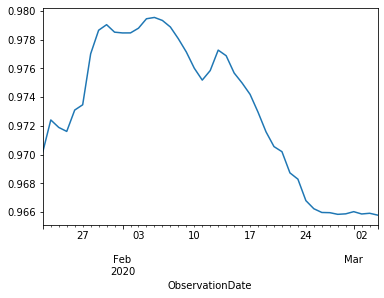

In [55]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()    #[[]] df y [] regresa una serie 
sr.plot();

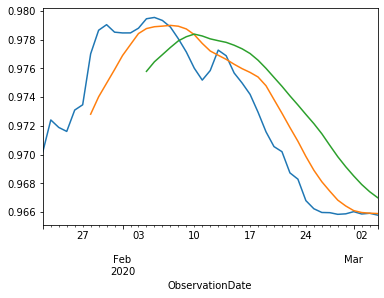

In [56]:
sr.plot()      #rolling nos permite generar ventanas de frecuencias                 
sr.rolling(window=7).mean().plot()         #7 dias 
sr.rolling(window=14).mean().plot();       #14 dias 

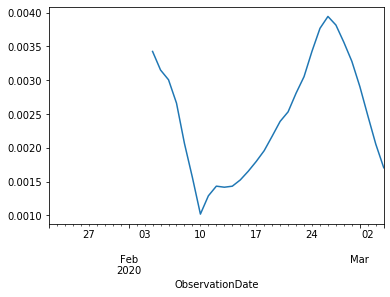

In [57]:
sr.rolling(window=14).std().plot();      

In [58]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Ivory Coast           1.0
Poland                1.0
Nigeria               1.0
Faroe Islands         1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [59]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [60]:
df_time = df.groupby(['Country/Region',pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [61]:
df_china = df_time.loc['Mainland China',:]

In [62]:
df_china.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


In [63]:
import matplotlib.pyplot as plt

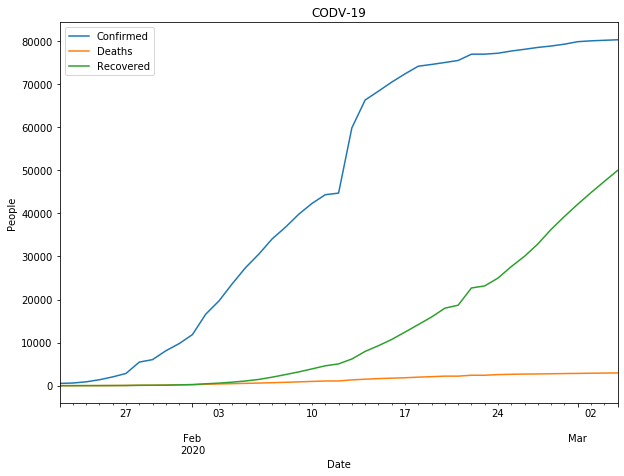

In [64]:
df_china.plot(figsize = (10,7), title = 'CODV-19')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

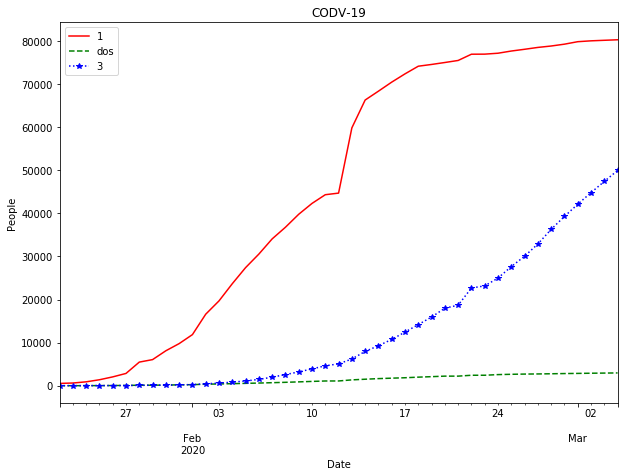

In [65]:
ax = df_china.plot(figsize = (10,7), title = 'CODV-19', legend = False, style = ['r-','g--','b:*'])  #La misma grfica anterior con algunos cambios
ax.legend(['1','dos','3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [66]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


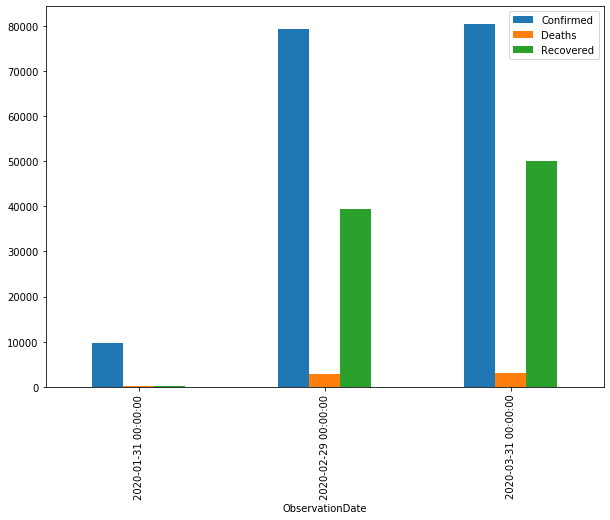

In [68]:
df_monthly.plot(figsize = (10,7), kind='bar');

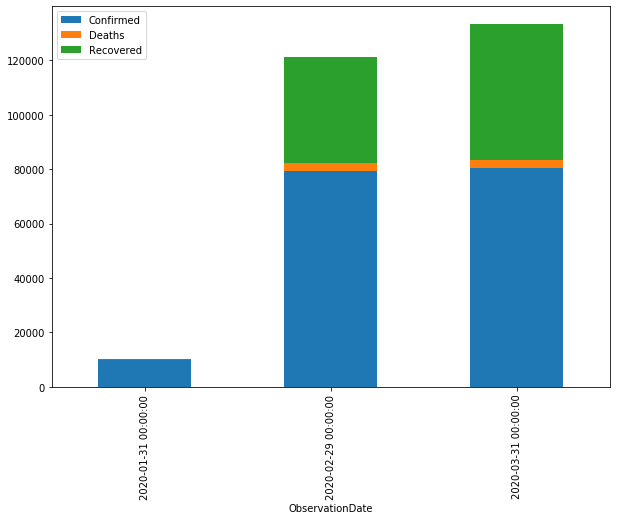

In [115]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked = True)

In [116]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


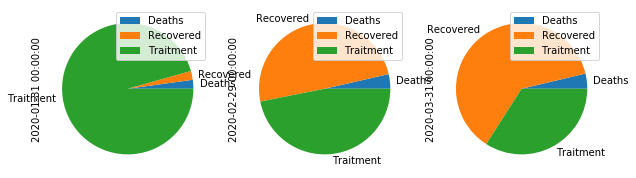

In [118]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (10,7), kind = 'pie', subplots=True);

In [120]:
df_china.head()

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22,547.0,17.0,28.0,0.968921
2020-01-23,639.0,18.0,30.0,0.971831
2020-01-24,916.0,26.0,36.0,0.971616
2020-01-25,1399.0,42.0,39.0,0.969979
2020-01-26,2062.0,56.0,49.0,0.972842


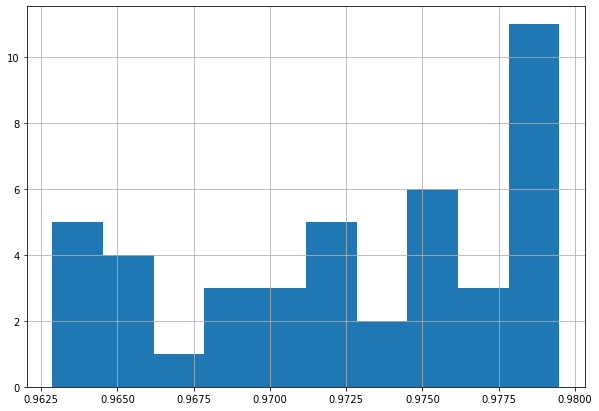

In [119]:
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']
df_china['rate'].hist(figsize = (10,7), bins = 10);

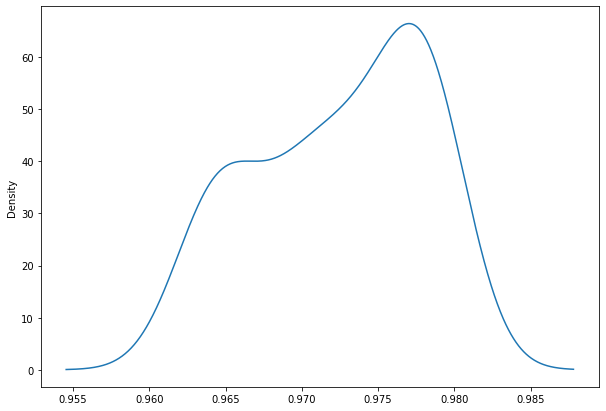

In [122]:
df_china['rate'].plot(kind = 'kde', figsize = (10,7))